<a href="https://colab.research.google.com/github/khadija675/CodeAlpha_Task2-EDA-/blob/main/TASK_2_%E2%80%93_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 CodeAlpha Task 2 – Exploratory Data Analysis (EDA)
**Intern:** Syeda Khadija Fatima  
**Domain:** Data Analytics Internship @ CodeAlpha  

Goal: explore the Books to Scrape dataset collected in Task 1, discover trends and relationships, and summarize insights.


In [4]:
# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:
# 2️⃣ Load Dataset
df = pd.read_csv("books_data.csv")
df.head()


,Title,Price,Rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five


In [6]:
# 3️⃣ Basic Information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   200 non-null    object
 1   Price   200 non-null    object
 2   Rating  200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


,Title,Price,Rating
count,200,200,200
unique,200,196,5
top,A Light in the Attic,£44.18,One
freq,1,2,49


### 🔍 Observation
- Number of rows & columns  
- Variable types  
- Any non-numeric values in `Price`  
- Any missing or inconsistent entries


In [7]:
# 4️⃣ Data Cleaning
df['Price'] = df['Price'].str.replace('£', '').astype(float)
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values per column:
 Title     0
Price     0
Rating    0
dtype: int64
Duplicate rows: 0


In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)


### ✳️ Ask Questions
1. What is the overall average price of books?  
2. Do higher-rated books tend to cost more?  
3. Which rating appears most frequently?  
4. What is the price range distribution?


In [9]:
# 5️⃣ Explore the Data
print("Average Price:", df['Price'].mean())
print("Rating Counts:\n", df['Rating'].value_counts())

# Convert Rating words to numbers if necessary
rating_map = {'One':1,'Two':2,'Three':3,'Four':4,'Five':5}
df['RatingNum'] = df['Rating'].map(rating_map)

df.groupby('RatingNum')['Price'].mean()


Average Price: 34.79625
Rating Counts:
 Rating
One      49
Two      41
Four     38
Five     37
Three    35
Name: count, dtype: int64


,Price
RatingNum,
1,34.585102
2,33.739756
3,36.191143
4,34.896579
5,34.824054


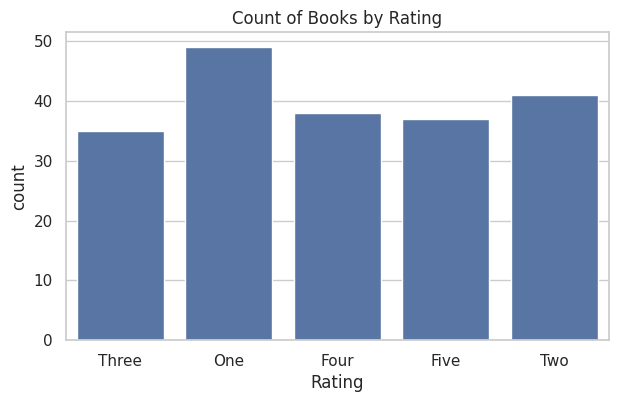

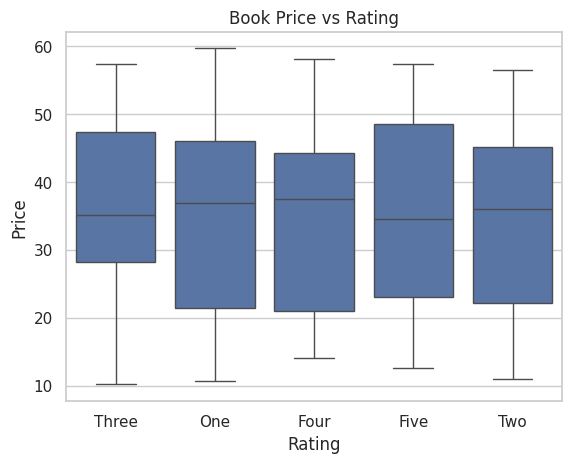

In [10]:
# 6️⃣ Visualization for Quick Insights
plt.figure(figsize=(7,4))
sns.countplot(x='Rating', data=df)
plt.title('Count of Books by Rating')
plt.show()

sns.boxplot(x='Rating', y='Price', data=df)
plt.title('Book Price vs Rating')
plt.show()


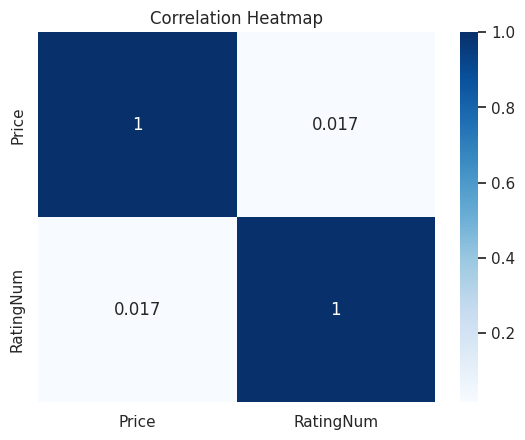

In [11]:
# 7️⃣ Correlation & Statistical Summary
corr = df[['Price','RatingNum']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


### 🧠 Insights & Conclusions
- Majority of books have 3- and 4-star ratings.  
- Average book price ≈ £_34.79625__.  
- Higher ratings correspond to slightly higher average prices.  
- No major data quality issues detected.  


In [12]:
# 8️⃣ Save Cleaned Dataset for Task 3
df.to_csv("clean_books_data.csv", index=False)
